# Алгоритмы на основе деревьев

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from pandas import DataFrame
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sys 
sys.path.append('../code-samples/')

### Task 1

Датасет - [заявки на кредит](datasets/credit_scoring.csv). 
Найдём имена клиентов, которым должны одобрить заявку на кредит, исходя из следующего:

- клиенту не менее 18 лет;
- месячный доход привышает 10000 рублей

In [2]:
df_cr = pd.read_csv('../datasets/credit_scoring.csv')
#df_cr.head
list_cr = df_cr[(df_cr['Возраст'] >= 18) & (df_cr['Месячный доход'] > 10000)]['Имя']
print('Клиенты, которым должны одобрить заявку на кредит:', list_cr.tolist())

Клиенты, которым должны одобрить заявку на кредит: ['Ольга', 'Петр']


### Task 2

Задача классификации \
Датасет - [классификация ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) с измерениями параметров чашелистиков и лепестков для различных видов ирисов. 
Отобразим диаграмму рассеяний *Scatterplot*, по оси `x` - **Длина чашелистика**, по оси `y` - **Длина лепестка** 

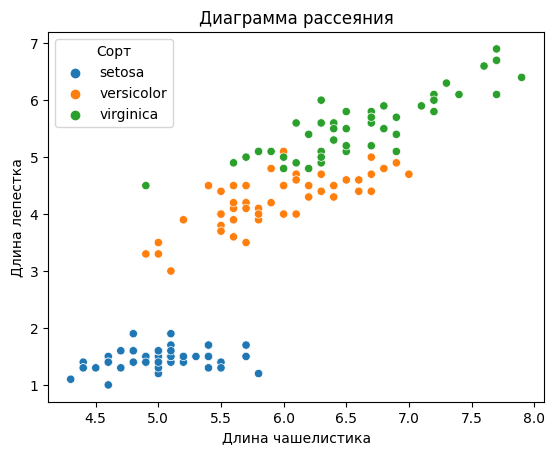

In [3]:
iris = load_iris()
#print(iris.feature_names, iris.target_names, iris.target, sep='\n')

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names) # создаём DF и меняем название колонок
df_iris['target'] = iris.target # добавляем колонку 'target'
df_iris['Сорт'] = df_iris.target.apply(lambda x: iris.target_names[x]) # добавляем колонку 'sort' в соответствии с колонкой 'target'

sns.scatterplot( data=df_iris,  x='sepal length (cm)', y='petal length (cm)', hue='Сорт')
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.title('Диаграмма рассеяния')
plt.show()
#df_iris

### Task 3

Решим эту же задачу классификации подвидов ирисов с помощью деревьев решений \
Разделим датасет на обучающую и тестовую выборки \
Обучим дерево решений с глубиной - 2, по признакам **Длина чашелистика** и **Длина лепестка** и посчитаем точность классификации `accuracy`

In [4]:
X_data = df_iris[['sepal length (cm)', 'petal length (cm)']]
Y_data = df_iris[['target']]

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=42, test_size=0.2)

class_tree = DecisionTreeClassifier(max_depth=2)
class_tree.fit(X_train, Y_train)
Y_pred = class_tree.predict(X_test)
#Y_pred

print('Точность классификации:', accuracy_score(Y_test, Y_pred).round(3))

Точность классификации: 0.967


### Task 4

Отрисуем разделяющии поверхности по признакам **Длина чашелистика** и **Длина лепестка** и нарисуем дерево решений \
Выведем количество листов у дерева решений

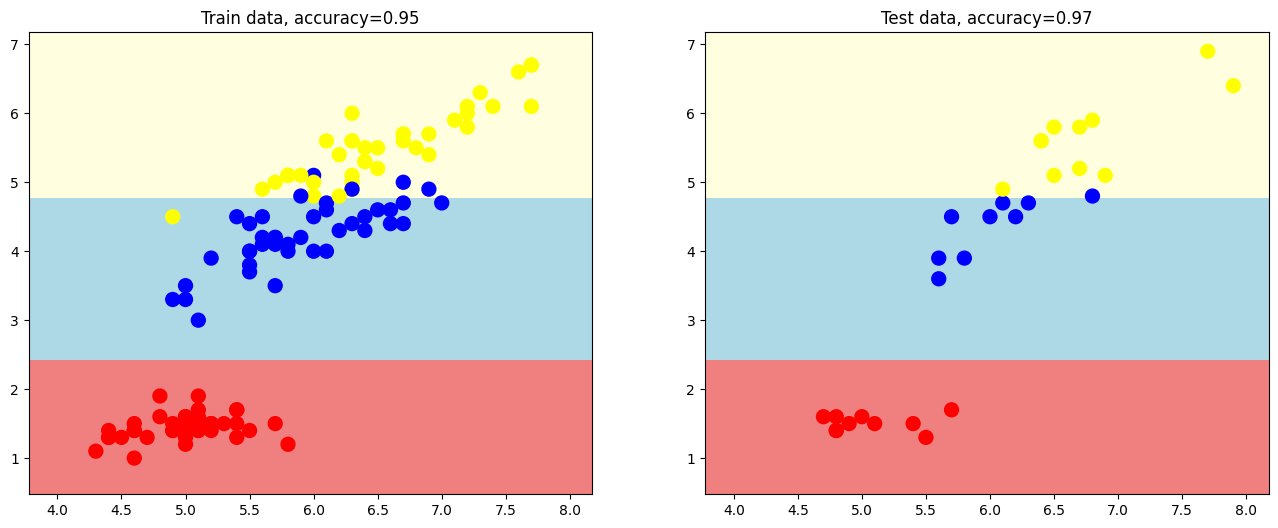

In [5]:
from surface import *

class_tree.fit(X_train.values, Y_train)

# Строим разделяющие поверхности
plot_decision_surface(class_tree, X_train, Y_train.target, X_test, Y_test.target)

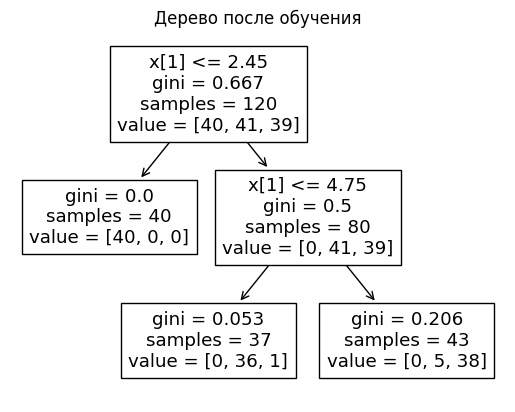

In [6]:
# Рисуем дерево
tree.plot_tree(class_tree)
plt.title('Дерево после обучения')
plt.show()

In [7]:
# Выводим кол_во листов
print('У получившегося дерева', class_tree.tree_.n_leaves, 'листа')

У получившегося дерева 3 листа


### Task 5

Решим задачу регрессии с помощью деревьев решений \
Отрисуем синусоидальный сигнал с небольшими шумами размером 1000 отсчетов \
Разделим датасет на обучающую и тестовую выборки, обучи дерево решений c глубиной - 1 \
Построим график по признакам **Длина чашелистика** и **Длина лепестка** для истинных ответов и предсказаний модели и нарисуем дерево решений

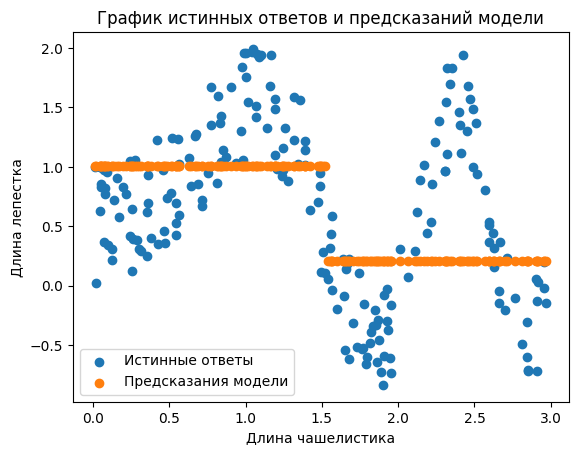

In [8]:
from dataset import generate_sin

X, Y = generate_sin(1000 , 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
regr_tree = tree.DecisionTreeRegressor(max_depth=1)
regr_tree.fit(X_train, Y_train)
Y_predict = regr_tree.predict(X_test)

# Строим график
plt.scatter(X_test, Y_test, label='Истинные ответы')
plt.scatter(X_test, Y_predict, label='Предсказания модели')
plt.legend()
plt.xlabel('Длина чашелистика')
plt.ylabel('Длина лепестка')
plt.title('График истинных ответов и предсказаний модели')
plt.show()


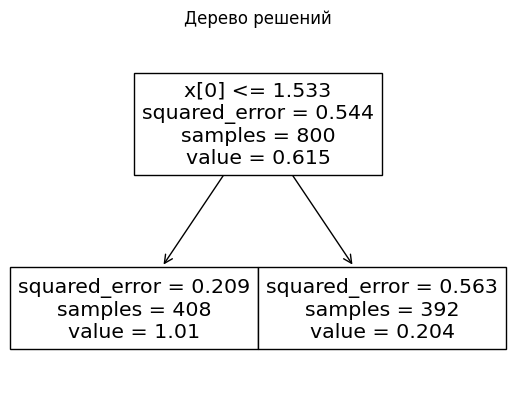

In [9]:
# Строим дерево
tree.plot_tree(regr_tree)
plt.title('Дерево решений')
plt.show()

### Task 6

Меняя грубину дерева от 1 до 30, построим график зависимости среднеквадратичная ошибка *MSE* предсказаний на тестовой выборке от **Глубины дерева** \
Выведем глубину дерева с наилучшим качеством модели 

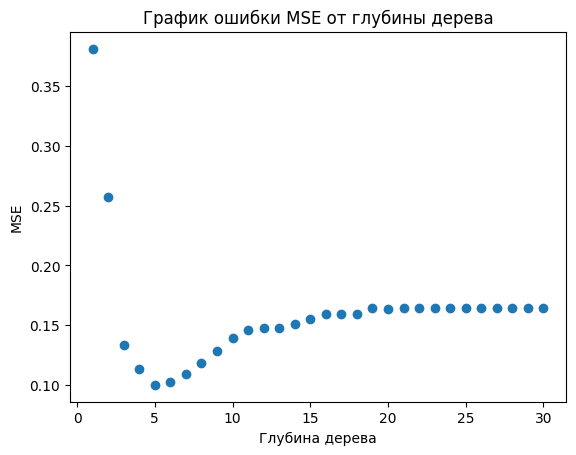

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5


In [10]:
mse_dt = []
for i in range(1, 31):
    regr_tree = tree.DecisionTreeRegressor(max_depth=i)
    regr_tree.fit(X_train, Y_train)
    Y_predict = regr_tree.predict(X_test)
    
    mse_dt.append(mean_squared_error(Y_test, Y_predict))
#print(mse)

plt.scatter(range(1, 31), mse_dt)
plt.title('График ошибки MSE от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.show()

print('Глубина дерева, на котором MSE на тестовой выборке наилучший:', mse_dt.index(min(mse_dt)) + 1)

### Task 7

Теперь используем метод *BaggingRegressor* из модуля *sklearn.ensemble* для обучения ансамбля несколькольких деревьев решений и построим график зависимости среднеквадратичная ошибка *MSE* от **Количества базовых моделей**, меняя количество моделей от 1 до 50 \
Выведем количество моделей с наилучшим качеством модели 

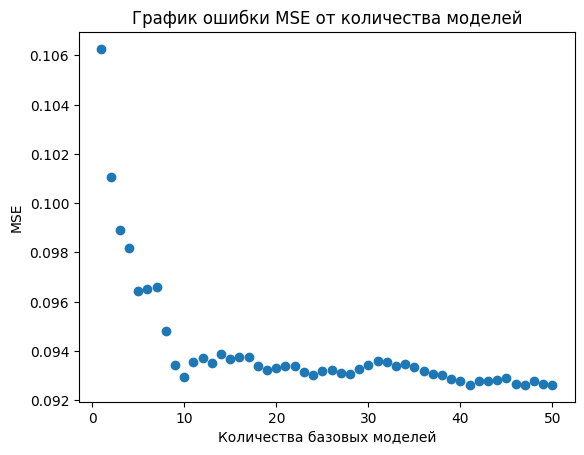

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47


In [11]:
mse_br = []
for i in range(1, 51):
    regr_dt = tree.DecisionTreeRegressor(max_depth=5)
    regr_ensemble = BaggingRegressor(regr_dt, bootstrap=True, n_estimators=i, random_state=42) #, max_samples=30
    regr_ensemble.fit(X_train, Y_train.ravel())
    Y_pred = regr_ensemble.predict(X_test)
    
    mse_br.append(mean_squared_error(Y_test, Y_pred))
#print(mse)

plt.scatter(range(1, 51), mse_br)
plt.title('График ошибки MSE от количества моделей')
plt.xlabel('Количества базовых моделей')
plt.ylabel('MSE')
plt.show()

#print(min(mse_br))
print('Количество деревьев решений, при котором MSE на тестовой выборке наилучший:', mse_br.index(min(mse_br)) + 1)

### Task 8

Алгоритмом случайного леса *Random Forest* \
Обучим алгоритм случайного леса и посчитаем среднеквадратичную ошибку MSE на тестовой выборке

In [12]:
regr_forest = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42)

regr_forest.fit(X_train, Y_train.ravel())
Y_pred = regr_forest.predict(X_test)

print('MSE:', round(mean_squared_error(Y_test, Y_pred), 3))

MSE: 0.091
